The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


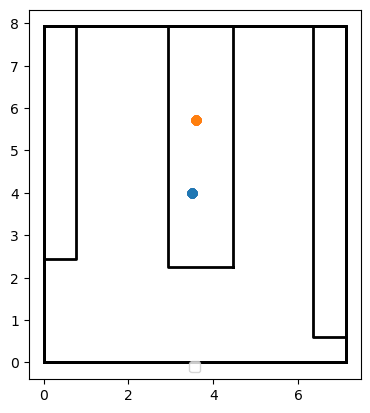

In [31]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '../')
import numpy as np 
import matplotlib.pyplot as plt
import rooms.dataset
import render
import trajectory
from IPython.display import Audio


D = rooms.dataset.dataLoader("classroomBase")

xyz_points = np.stack((3.5*np.ones(100),4*np.ones(100), 1*np.ones(100)),axis=-1)
# Compute forward and left facing vectors
forwards = np.array(100*[np.array([0,1,0])])
lefts = np.array(100*[np.array([-1,0,0])])

# Source xyz does not change
source_xyzs = np.array([D.speaker_xyz]*100)

def get_rot_vectors(theta):
    return np.cos(theta-np.pi/2), np.sin(theta-np.pi/2), np.cos(theta-np.pi), np.sin(theta-np.pi)

thetas = np.linspace(0, 8*np.pi, 100)

source_axis_1s = []
source_axis_2s = []

for i in range(100):
    theta = thetas[i]
    x_1, y_1, x_2, y_2 = get_rot_vectors(theta)
    source_axis_1s.append(np.array([x_1, y_1, 0]))
    source_axis_2s.append(np.array([x_2, y_2, 0]))
    

    

T = trajectory.Trajectory("classroomRotation", "classroomBase",xyz_points, forwards, lefts, source_xyzs, source_axis_1s, source_axis_2s)

# Plot trajectory points (orange is speaker location)
T.plot_traj()

In [ ]:
T.save_paths() # Trace and store paths
R = render.Renderer(n_surfaces=9, toa_perturb=False)
R = R.cuda()
T.get_RIRs(R,"../models/classroomBase/weights.pt") # Compute RIRs using pretrained model
T.load_RIRs() # Load RIRs

T.convolve_audio("chopper_long.wav", cutoff=30*48000) # Render Audio
rendered_audio = T.fill("chopper_long.wav", fade_length=5)

In [ ]:
Audio(rendered_audio, rate=48000)